In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Option pour avoir des graphiques directement dans le notebook
%matplotlib inline


In [2]:
df = pd.read_csv('../data/tobacco.csv')

In [3]:
df.head()

,Year,State,Smoke everyday,Smoke some days,Former smoker,Never smoked,Location 1
0,1996,Puerto Rico,9.40%,5.10%,16%,69.50%,Puerto Rico\n
1,1997,Puerto Rico,9.40%,5%,15.70%,69.90%,Puerto Rico\n
2,1998,Puerto Rico,10.10%,5.20%,16.80%,67.90%,Puerto Rico\n
3,1999,Puerto Rico,9.70%,4%,15.30%,71%,Puerto Rico\n
4,2000,Puerto Rico,9.20%,3.90%,15.20%,71.60%,Puerto Rico\n


In [4]:
# Vérification des données manquantes
df.isnull().sum()

Year                0
State               0
Smoke everyday      0
Smoke some days     0
Former smoker       0
Never smoked        0
Location 1         37
dtype: int64

In [5]:
df.drop(columns=['Location 1'], inplace=True)

In [6]:
df.head()

,Year,State,Smoke everyday,Smoke some days,Former smoker,Never smoked
0,1996,Puerto Rico,9.40%,5.10%,16%,69.50%
1,1997,Puerto Rico,9.40%,5%,15.70%,69.90%
2,1998,Puerto Rico,10.10%,5.20%,16.80%,67.90%
3,1999,Puerto Rico,9.70%,4%,15.30%,71%
4,2000,Puerto Rico,9.20%,3.90%,15.20%,71.60%


In [7]:
# Transformation des pourcentages en float pour calculs
df['Smoke everyday'] = df['Smoke everyday'].str.replace('%', '').astype(float) / 100
df['Smoke some days'] = df['Smoke some days'].str.replace('%', '').astype(float) / 100
df['Former smoker'] = df['Former smoker'].str.replace('%', '').astype(float) / 100
df['Never smoked'] = df['Never smoked'].str.replace('%', '').astype(float) / 100

In [8]:
# Verification du changement en float
df['Smoke everyday'].dtype
df['Smoke some days'].dtype
df['Former smoker'].dtype
df['Never smoked'].dtype

dtype('float64')

In [9]:
df.head()

,Year,State,Smoke everyday,Smoke some days,Former smoker,Never smoked
0,1996,Puerto Rico,0.094,0.051,0.160,0.695
1,1997,Puerto Rico,0.094,0.050,0.157,0.699
2,1998,Puerto Rico,0.101,0.052,0.168,0.679
3,1999,Puerto Rico,0.097,0.040,0.153,0.710
4,2000,Puerto Rico,0.092,0.039,0.152,0.716


In [10]:
# Filtrer pour Hawaii + verification
df_hawaii = df[df['State'] == 'Hawaii']
df_hawaii.head()

,Year,State,Smoke everyday,Smoke some days,Former smoker,Never smoked
51,2001,Hawaii,0.165,0.040,0.240,0.555
145,2007,Hawaii,0.129,0.041,0.260,0.570
173,2006,Hawaii,0.130,0.046,0.251,0.573
283,2009,Hawaii,0.104,0.050,0.269,0.577
345,1998,Hawaii,0.158,0.037,0.261,0.544


In [11]:
# Eviter désordre
df_hawaii_ordered_by_year = df_hawaii.sort_values('Year')
df_hawaii_ordered_by_year.head(15)

,Year,State,Smoke everyday,Smoke some days,Former smoker,Never smoked
697,1995,Hawaii,0.151,0.025,0.216,0.609
829,1996,Hawaii,0.183,0.040,0.241,0.537
584,1997,Hawaii,0.143,0.044,0.264,0.549
345,1998,Hawaii,0.158,0.037,0.261,0.544
605,1999,Hawaii,0.144,0.041,0.229,0.586
635,2000,Hawaii,0.158,0.039,0.242,0.562
51,2001,Hawaii,0.165,0.040,0.240,0.555
637,2002,Hawaii,0.171,0.039,0.243,0.547
462,2003,Hawaii,0.141,0.032,0.241,0.586
543,2005,Hawaii,0.121,0.049,0.262,0.568


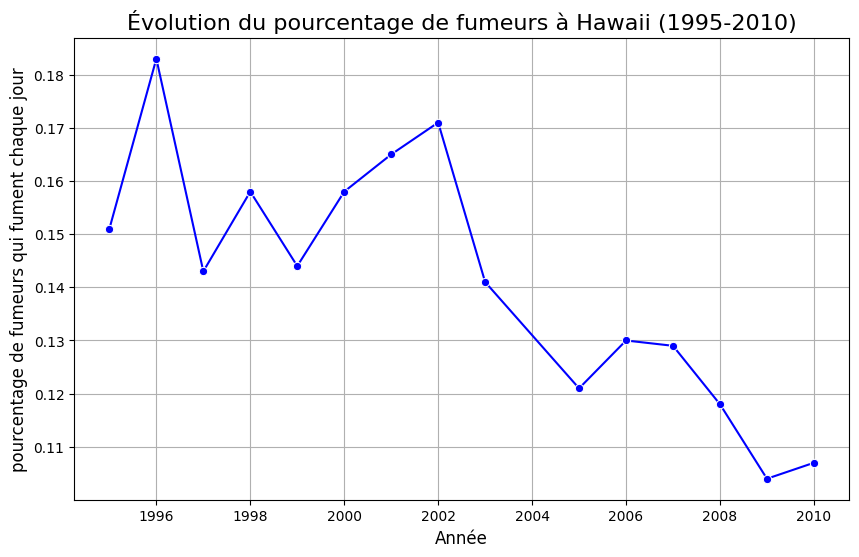

In [12]:
# Créer un graphique de l'évolution du pourcentage de fumeurs au fil des années
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_hawaii_ordered_by_year, x='Year', y='Smoke everyday', marker='o', color='b')

# Ajouter des labels et un titre
plt.title('Évolution du pourcentage de fumeurs à Hawaii (1995-2010)', fontsize=16)
plt.xlabel('Année', fontsize=12)
plt.ylabel('pourcentage de fumeurs qui fument chaque jour', fontsize=12)

# Afficher le graphique + save dans un dossier dédié
plt.grid(True)
plt.savefig("../resultsGraphs/evolution_fumeurs_hawaii.png", dpi=300)
plt.show()